In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Deleting Duplicate Values

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.rename(columns={
    'approx_cost(for two people)':'cost',
    'listed_in(type)':'type',
    'listed_in(city)':'city'
})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## Removing NAN Values from the dataset

In [10]:
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']

In [11]:
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5', ''))

In [13]:
df['rate'] = df['rate'].replace('nan', np.nan)

In [14]:
df['rate'] = df['rate'].astype('float')

In [15]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [16]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

<Axes: xlabel='rate', ylabel='Count'>

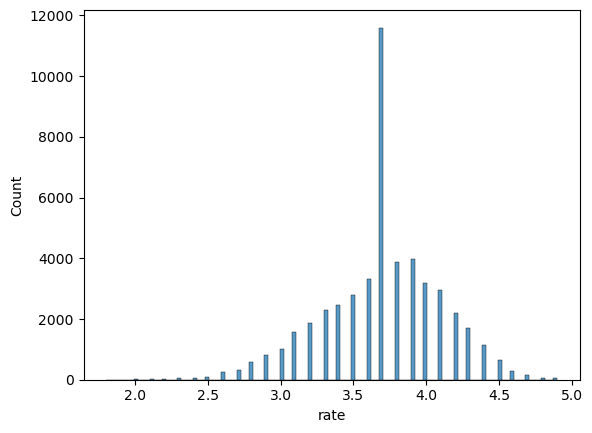

In [17]:
sns.histplot(df['rate'])

In [18]:
df['cost'] = df['cost'].apply(lambda x: str(x).replace(',', ''))

In [19]:
df['cost'] = df['cost'].astype(float)

In [20]:
df['cost'] = df['cost'].fillna(df['cost'].mean())
df['cost'].isna().sum()

0

In [21]:
df['cost'] = np.log(df['cost'])

In [22]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

<Axes: xlabel='cost', ylabel='Count'>

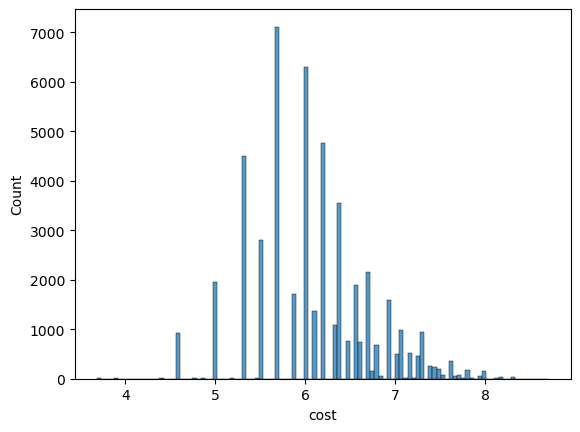

In [23]:
sns.histplot(df['cost'])

In [24]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",6.684612,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",6.684612,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",6.684612,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",5.703782,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",6.396930,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           49440 non-null  object 
 1   address       49440 non-null  object 
 2   name          49440 non-null  object 
 3   online_order  49440 non-null  object 
 4   book_table    49440 non-null  object 
 5   rate          49440 non-null  float64
 6   votes         49440 non-null  int64  
 7   phone         48250 non-null  object 
 8   location      49419 non-null  object 
 9   rest_type     49215 non-null  object 
 10  dish_liked    23492 non-null  object 
 11  cuisines      49395 non-null  object 
 12  cost          49440 non-null  float64
 13  reviews_list  49440 non-null  object 
 14  menu_item     49440 non-null  object 
 15  type          49440 non-null  object 
 16  city          49440 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.8+ MB


## Now it's time to do EDA on the dataset

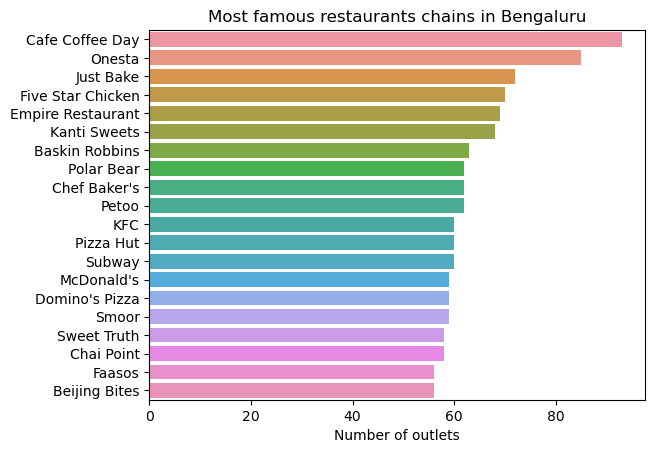

In [28]:

top_chains = df['name'].value_counts()[:20]
sns.barplot(x=top_chains, y=top_chains.index)
plt.title('Most famous restaurants chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

In [37]:
rest=df['rest_type'].value_counts()[:10]

<Axes: xlabel='rest_type'>

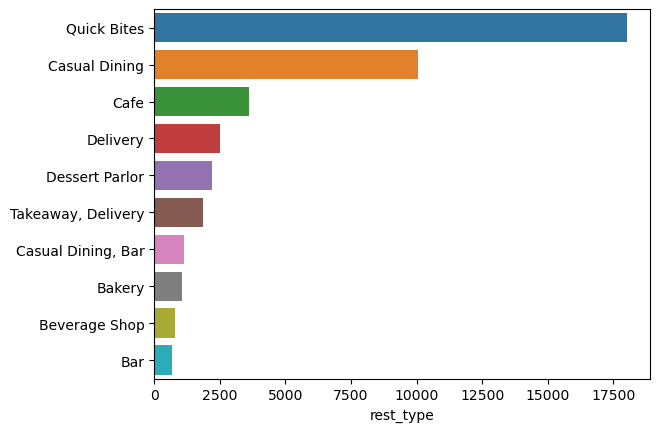

In [39]:
sns.barplot(x=rest,y=rest.index)


## Rating Analysis

In [40]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [41]:
df.rate.value_counts().index

Float64Index([3.700448817952718,               3.9,               3.8,
                            3.7,               3.6,               4.0,
                            4.1,               3.5,               3.4,
                            3.3,               4.2,               3.2,
                            4.3,               3.1,               4.4,
                            3.0,               2.9,               4.5,
                            2.8,               2.7,               4.6,
                            2.6,               4.7,               2.5,
                            2.4,               4.8,               4.9,
                            2.3,               2.2,               2.1,
                            2.0,               1.8],
             dtype='float64')

C:\Users\hp\AppData\Local\Temp\ipykernel_17136\1484274722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'], bins=20)


<Axes: xlabel='rate', ylabel='Density'>

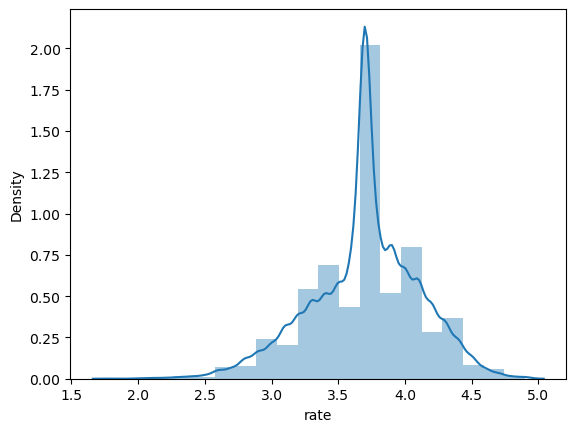

In [45]:

sns.distplot(df['rate'], bins=20)

## Cost vs Rating

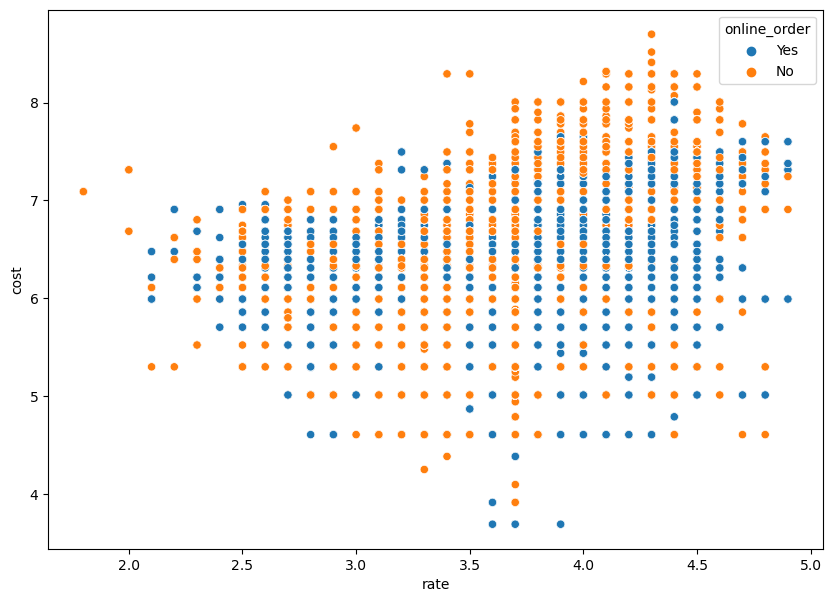

In [46]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rate', y='cost', hue='online_order', data=df)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17136\2117322929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'])


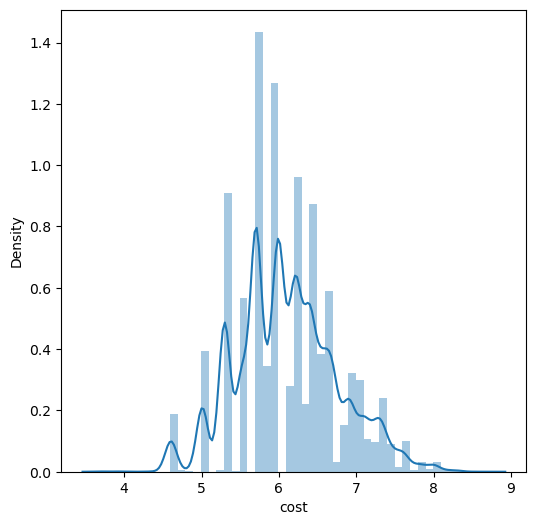

In [47]:
plt.figure(figsize=(6,6))
sns.distplot(df['cost'])
plt.show()

<Axes: xlabel='location'>

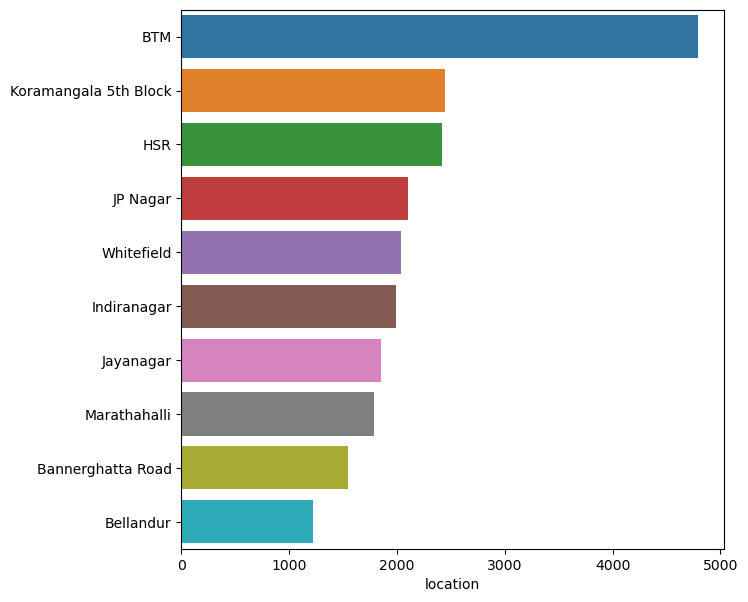

In [54]:
plt.figure(figsize=(7,7))
locations = df['location'].value_counts()[:10]
sns.barplot(x=locations, y=locations.index)

In [59]:
pip install geopy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
from geopy.geocoders import Nominatim

locations = pd.DataFrame({"Name":df['location'].unique()})
locations['Name'] = locations['Name'].apply(lambda x: "Bangalore "+str(x))
locations.head()
lat_lon = []
geolocator = Nominatim(user_agent='app')
for location in locations['Name']:
    loc = geolocator.geocode(location)
    if loc is None:
        lat_lon.append(np.nan)
    else:
        geo = (loc.latitude, loc.longitude)
        lat_lon.append(geo)

locations['geo_loc'] = lat_lon
locations.to_csv('locations.csv', index=False)

In [63]:
locations['Name'] = locations['Name'].apply(lambda x:x.replace("Bangalore", '')[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9393328, 77.5539819)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3674838, 76.6616452)"
3,Jayanagar,"(12.9399039, 77.5826382)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"


## Heatmap of resturants based on location

In [64]:
rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
rest_locations.columns=['Name', 'count']
rest_locations = rest_locations.merge(locations, on='Name', how='left').dropna()
rest_locations['count'].max()

4793

In [66]:

def generateBaseMap(default_location=[11, 80], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


In [71]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/108.4 kB 991.0 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 550.5 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 419.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from folium.plugins import HeatMap
import folium
lat, lon = zip(*np.array(rest_locations['geo_loc']))
rest_locations['lat'] = lat
rest_locations['lon'] = lon
basemap = generateBaseMap()
HeatMap(rest_locations[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)

In [76]:
basemap

<Axes: xlabel='cuisines'>

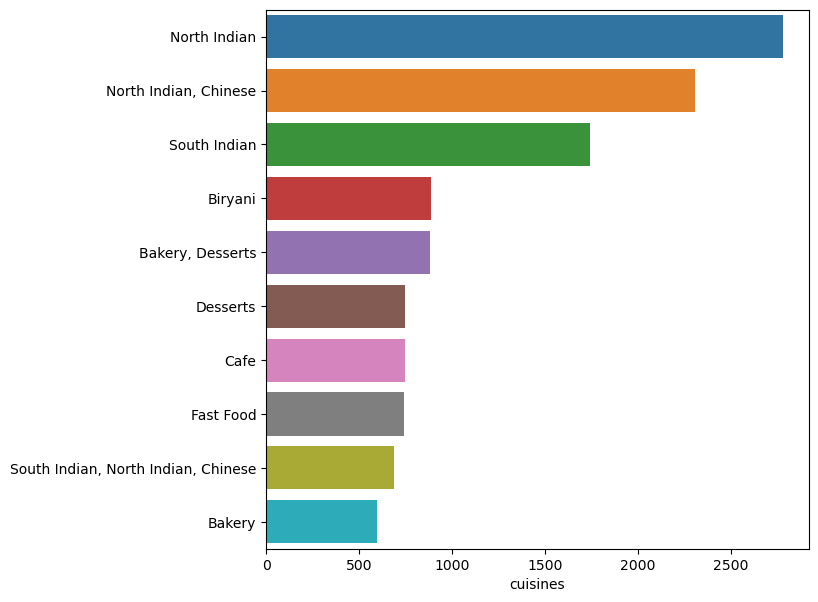

In [81]:


plt.figure(figsize=(7,7))
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)

## Top North Indian resturants

In [84]:

def produce_data(col, name):
    data = pd.DataFrame(df[df[col] == name].groupby(['location'], as_index=False)['url'].agg('count'))
    data.columns=['Name', 'count']
    print(data.head())
    data = data.merge(locations, on='Name', how='left').dropna()
    data['lat'], data['lon'] = zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'], axis=1)

In [85]:
north_india = produce_data('cuisines', 'North Indian')


                Name  count
0                BTM    319
1       Banashankari     28
2          Banaswadi     12
3  Bannerghatta Road     72
4       Basavanagudi     20


In [86]:

basemap=generateBaseMap()
HeatMap(north_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

##South Indian Hotels

In [87]:

south_india = produce_data('cuisines', 'South Indian')
# south_india.columns
basemap = generateBaseMap()
HeatMap(south_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    106
1       Banashankari     81
2          Banaswadi     37
3  Bannerghatta Road     44
4       Basavanagudi     87


## Doing Analysis on Resturant Chains

In [88]:

def produce_chains(name):
    data_chain = pd.DataFrame(df[df['name'] == name]['location'].value_counts().reset_index())
    data_chain.columns = ['Name', 'count'] 
    data_chain = data_chain.merge(locations, on='Name', how='left').dropna()
    data_chain['lan'], data_chain['lon'] = zip(*data_chain['geo_loc'].values)
    return data_chain[['Name', 'count', 'lan', 'lon']]


In [89]:
new_df = df.groupby(['rest_type', 'name']).agg('count')
datas = new_df.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x:x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})


In [93]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB 1.9 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 777.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 930.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 952.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


## Dishes Liked in Wordcloud format

## Feature Engineering?

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           49440 non-null  object 
 1   address       49440 non-null  object 
 2   name          49440 non-null  object 
 3   online_order  49440 non-null  object 
 4   book_table    49440 non-null  object 
 5   rate          49440 non-null  float64
 6   votes         49440 non-null  int64  
 7   phone         48250 non-null  object 
 8   location      49419 non-null  object 
 9   rest_type     49215 non-null  object 
 10  dish_liked    49440 non-null  object 
 11  cuisines      49395 non-null  object 
 12  cost          49440 non-null  float64
 13  reviews_list  49440 non-null  object 
 14  menu_item     49440 non-null  object 
 15  type          49440 non-null  object 
 16  city          49440 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.8+ MB


In [98]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,[],"North Indian, Mughlai, Chinese",6.684612,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,[],"Chinese, North Indian, Thai",6.684612,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",[],"Cafe, Mexican, Italian",6.684612,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,[],"South Indian, North Indian",5.703782,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,[],"North Indian, Rajasthani",6.396930,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [99]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)


## One HOT Encoding

In [100]:

location_dummies = pd.get_dummies(df['location'])
rest_type_dummies = pd.get_dummies(df['rest_type'])
type_dummies = pd.get_dummies(df['type'])


In [101]:
final_df = pd.concat([df, location_dummies, rest_type_dummies, type_dummies], axis=1)
final_df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,0,0,0,1,0,0,0,0,0,0


In [102]:

final_df = final_df.drop(['url','address', 'name', 'rest_type', 'location', 'cuisines', 'dish_liked', 'reviews_list', 'menu_item','phone', 'city', 'type'], axis=1)
final_df.head(1)


,online_order,book_table,rate,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,1,4.1,775,6.684612,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


C:\Users\hp\AppData\Local\Temp\ipykernel_17136\1276505611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})


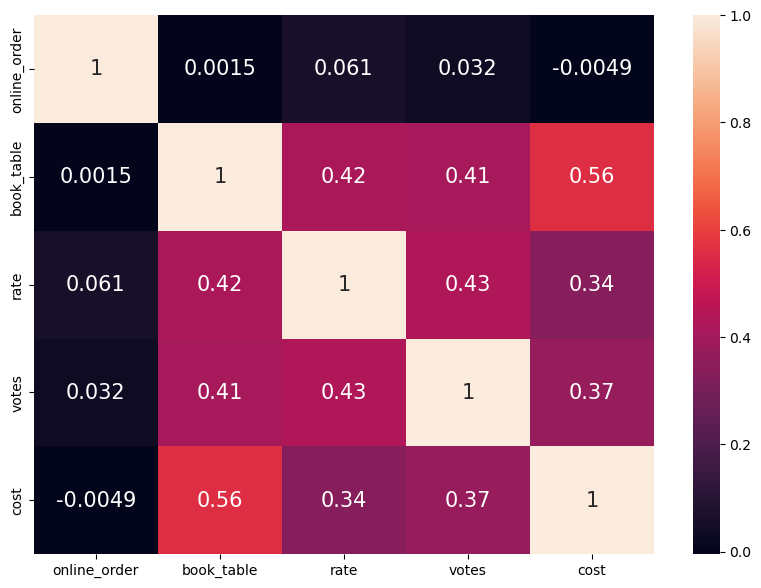

In [103]:

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})
plt.show()

In [105]:
final_df.to_csv('zomato_PPD.csv', index=False)


In [106]:
X = final_df.drop(['rate'], axis=1)
X.head()

,online_order,book_table,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,1,775,6.684612,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,787,6.684612,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,918,6.684612,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,88,5.703782,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,166,6.396930,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
y=final_df['rate']

In [108]:

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

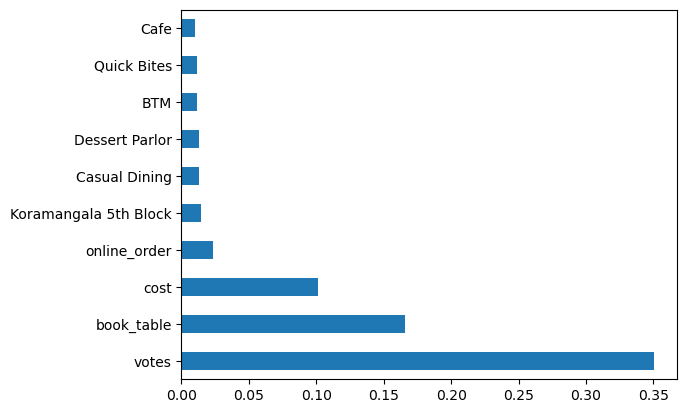

In [109]:

# Plotting graph of feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)


In [112]:

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [113]:
dtree_pred = dtree.predict(X_test)
X_train.head()


,online_order,book_table,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
36156,0,0,0,5.703782,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4056,1,0,4,5.703782,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33644,1,0,511,6.214608,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41785,1,0,40,6.214608,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25859,1,0,0,5.010635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, dtree_pred)
print('R-Square Score: ', r2*100)

# Calculate the absolute errors (MAE)
dtree_error = abs(dtree_pred - y_test)
print("Mean Absolute Error: ", round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_error / y_test)

# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is: ', round(dtree_accuracy, 2), '%')

R-Square Score:  84.12805353307095
Mean Absolute Error:  3.7 degrees.
Accuracy for Decision tree regressor is:  98.66 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


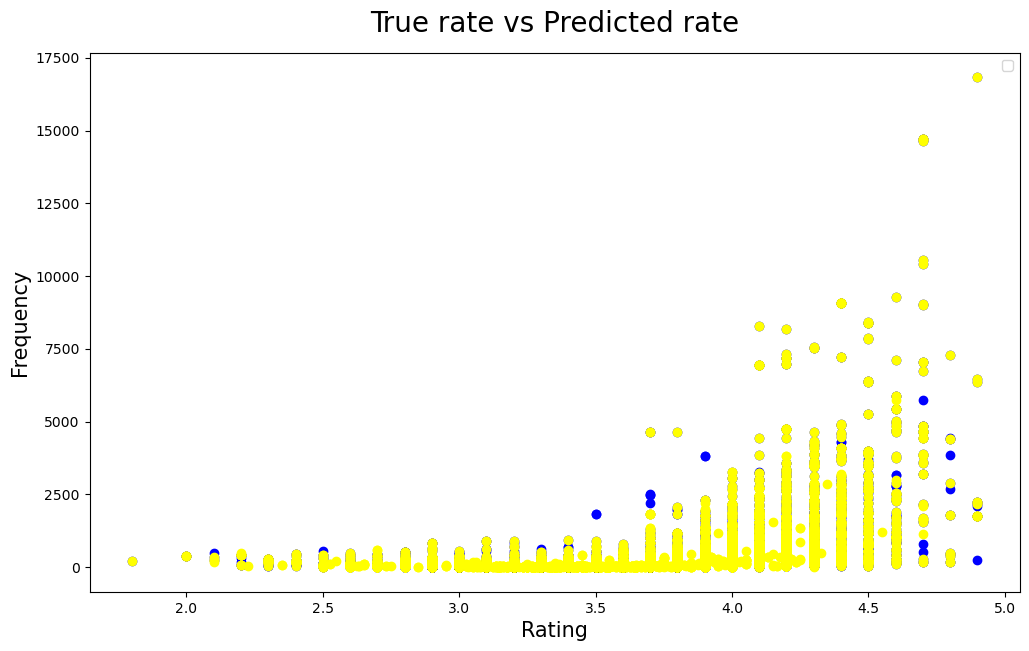

In [117]:

# Plotting the Random Forest values predicted rating
plt.figure(figsize=(12, 7))
plt.scatter(y_test, X_test.iloc[:,2], color='blue')
plt.title('True rate vs Predicted rate', size=20, pad=15)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.scatter(dtree_pred, X_test.iloc[:,2], color='yellow')
plt.legend()
plt.show()

## Finally we make a pickle file to do model Deployment

In [118]:
import pickle

In [119]:

with open('Decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtree, f)